In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#https://github.com/chrieke/awesome-satellite-imagery-datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input/aerialview'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aerialview/aerialview2.jpg
/kaggle/input/aerialview/aerialview5.jpg
/kaggle/input/aerialview/aerialview1.jpg
/kaggle/input/aerialview/aerialview6.jpg
/kaggle/input/aerialview/aerialview4.jpg
/kaggle/input/aerialview/aerialview3.jpg


In [2]:
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
path = '/kaggle/input/aerialview/'

In [4]:
#Return BGR to RGB - https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
def convert_BGR_to_RGB(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

def plot_BGR_to_RGB(image):
    plt.imshow(convert_BGR_to_RGB(image))

## Contour Detection 

Boundaries of objects line or curve that joins the continuous points along the boundary of object

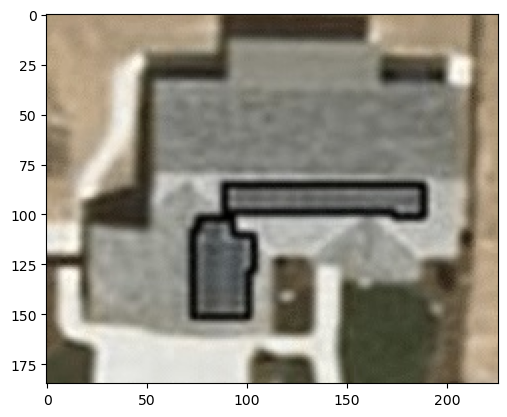

In [5]:
img = cv.imread(path + 'aerialview4.jpg')
plot_BGR_to_RGB(img)

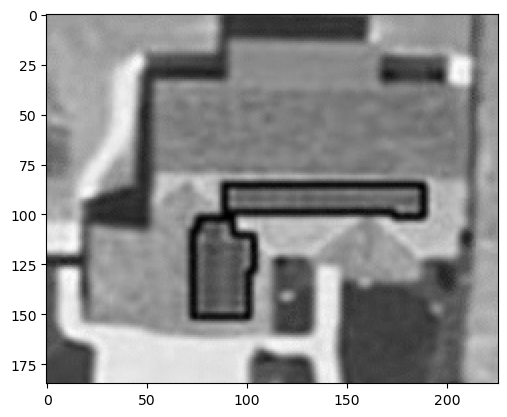

In [6]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plot_BGR_to_RGB(gray)

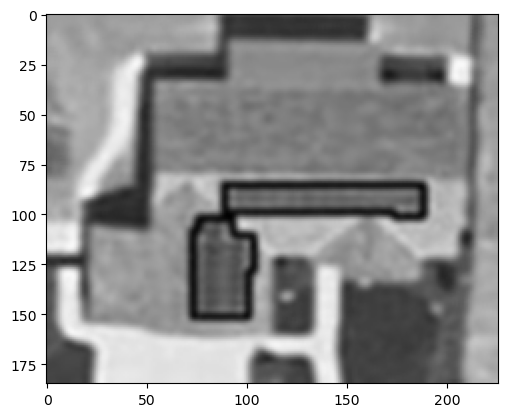

In [7]:
#BLur
blur = cv.GaussianBlur(gray, (3,3),cv.BORDER_DEFAULT)
plot_BGR_to_RGB(blur)

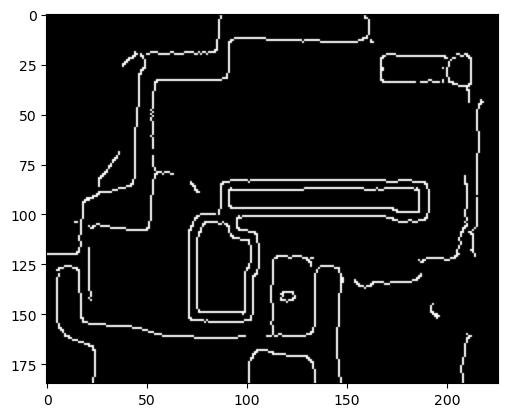

In [8]:
#Edges - Using Canny
canny = cv.Canny(blur, threshold1=125, threshold2=175)
plot_BGR_to_RGB(canny)

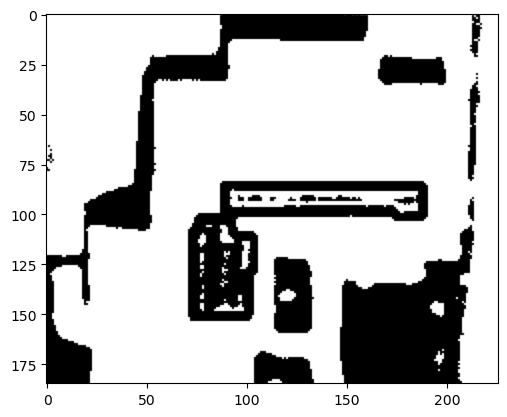

In [9]:
#Thresholding - binarize, below - 125 to 0 and greater to - 255
ret, thres = cv.threshold(gray,thresh=100, maxval=255,type=cv.THRESH_BINARY)
plot_BGR_to_RGB(thres)

In [10]:
#RETR_EXTERNAL, RETR_TREE - Approx - CHAIN_APPROX_NONE -returns all, CHAIN_APPROX_SIMPLE
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(len(contours))

32


In [11]:
#RETR_EXTERNAL, RETR_TREE - Approx - CHAIN_APPROX_NONE -returns all, CHAIN_APPROX_SIMPLE
thres_contours, hierarchies = cv.findContours(thres, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(len(contours))

32


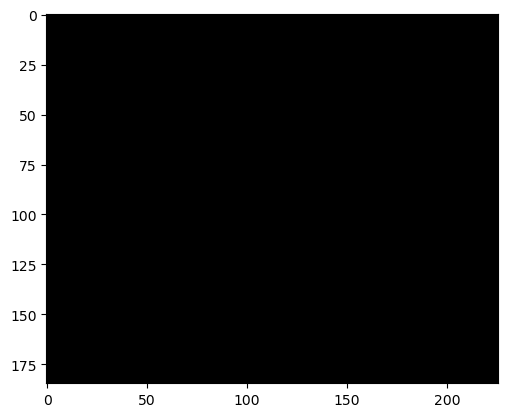

In [12]:
blank = np.zeros(img.shape, dtype='uint8')
plot_BGR_to_RGB(blank)


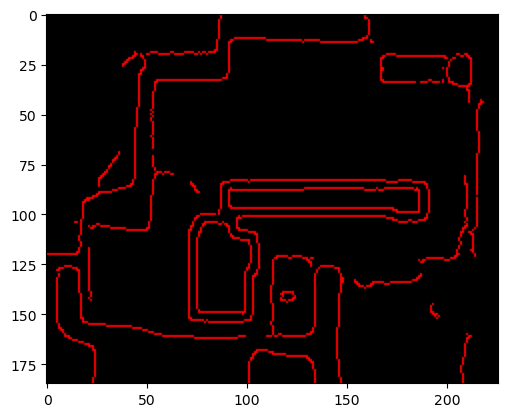

In [13]:
cv.drawContours(blank, contours,-1,(0,0,255), 1)
plot_BGR_to_RGB(blank)

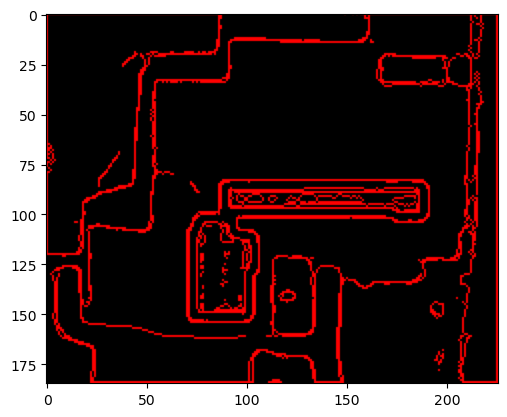

In [14]:
cv.drawContours(blank, thres_contours,-1,(0,0,255), 1)
plot_BGR_to_RGB(blank)

## Color Space

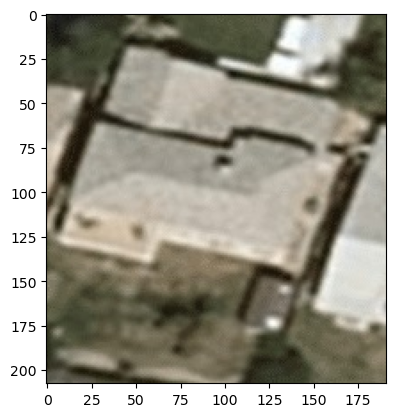

In [15]:
img = cv.imread(path + 'aerialview6.jpg')
plot_BGR_to_RGB(img)

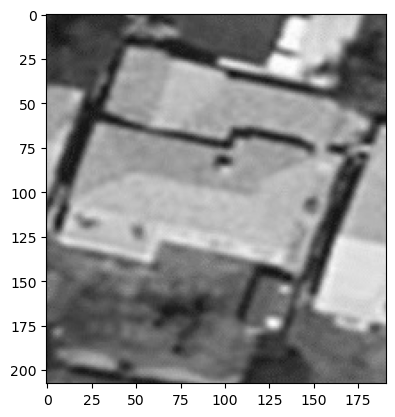

In [16]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plot_BGR_to_RGB(gray)

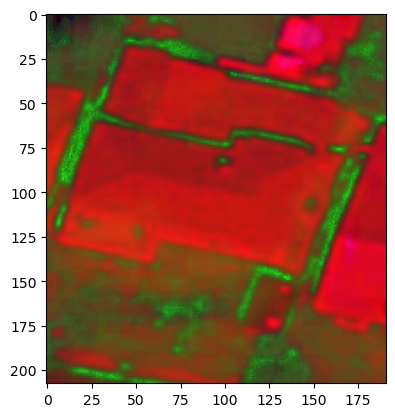

In [17]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV) # humans perceive
plot_BGR_to_RGB(hsv)

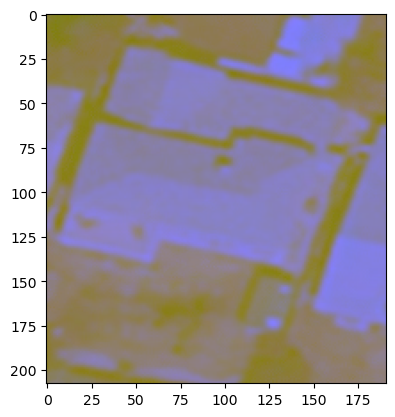

In [18]:
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB) # humans perceive
plot_BGR_to_RGB(lab)